In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Df = pd.read_csv('happiness_score_dataset.csv')
Df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


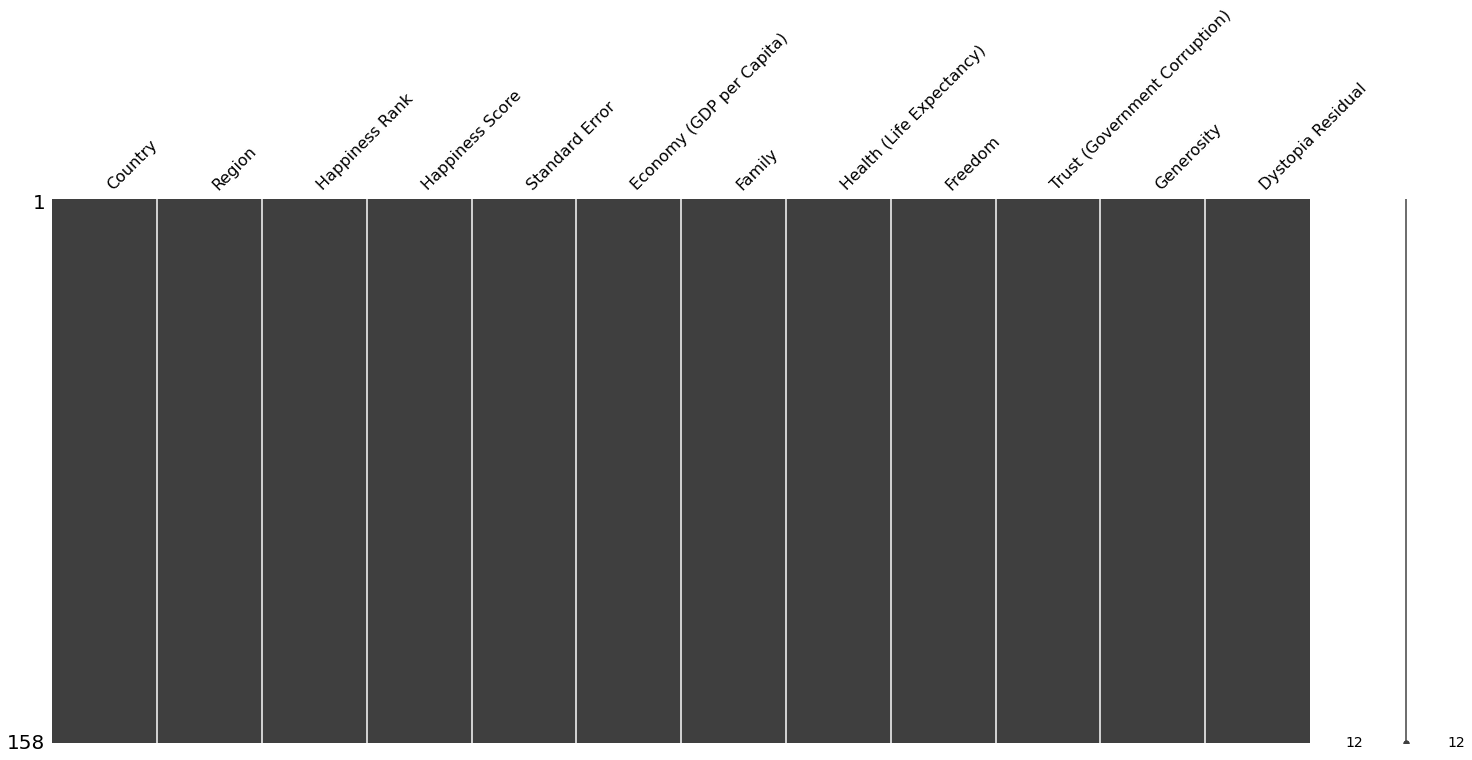

In [5]:
import missingno
missingno.matrix(Df);

In [6]:
Df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


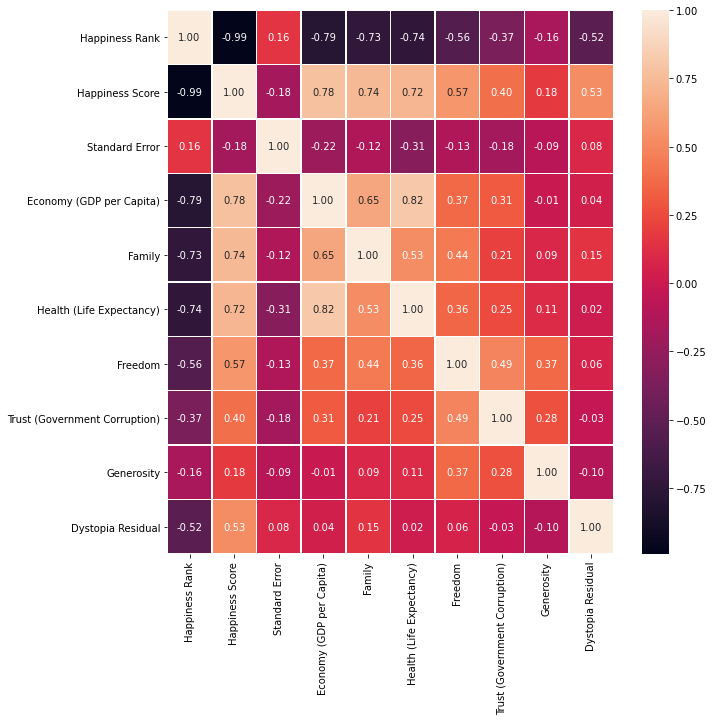

In [7]:
#lets check the correlation between the values
corr = Df.corr()
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr,
           annot = True,
           fmt = '.2f',
           linewidth = .5,);

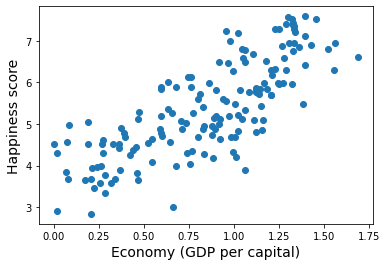

In [8]:
plt.scatter(Df['Economy (GDP per Capita)'], Df['Happiness Score'])
plt.xlabel('Economy (GDP per capital)', fontsize = 14)
plt.ylabel('Happiness score', fontsize = 14);

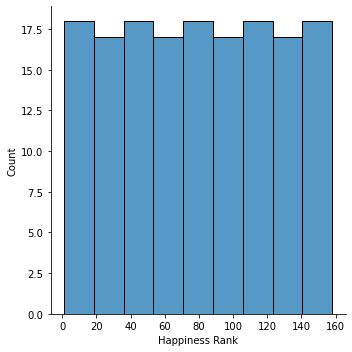

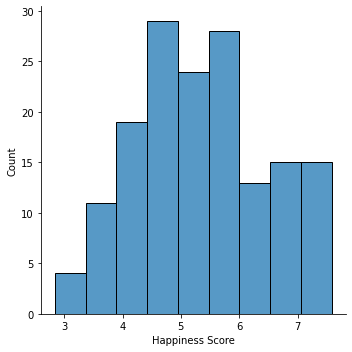

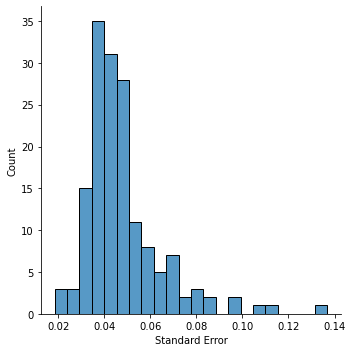

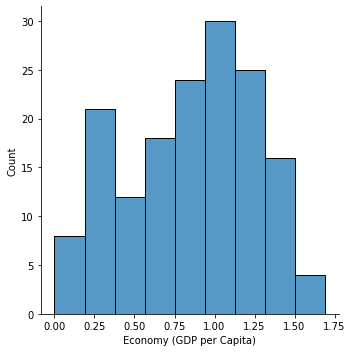

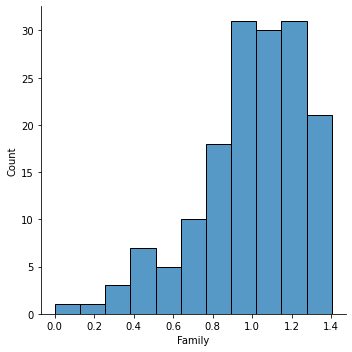

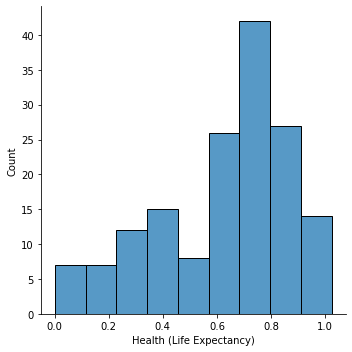

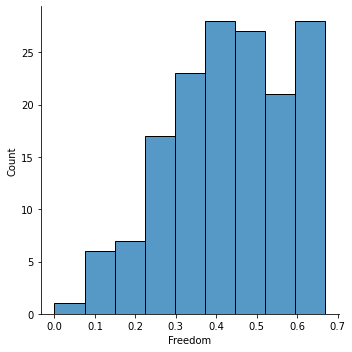

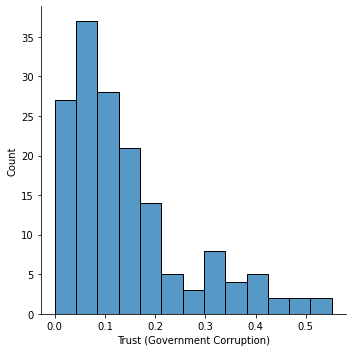

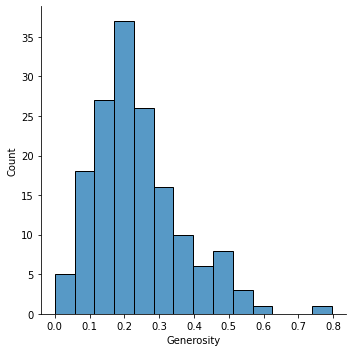

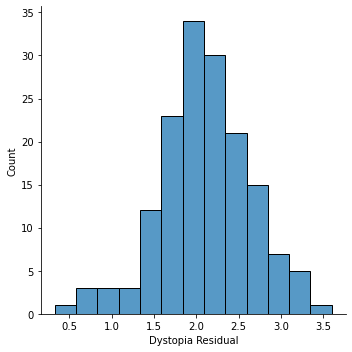

In [9]:
for  i in Df.columns:
    if pd.api.types.is_numeric_dtype(Df[i]):
        sns.displot(Df[i])
        plt.show()

In [10]:
for i in Df.columns:
    if not pd.api.types.is_numeric_dtype(Df[i]):
        Df[i] = Df[i].astype('category')
        Df[i] = Df[i].cat.codes

In [11]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    int16  
 1   Region                         158 non-null    int8   
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int16(1), int64(1), int8(1)
memory 

In [12]:
#treating the outliers
from scipy.stats import zscore
zscore = abs(zscore(Df))
print(Df.shape)
df_final = Df.loc[(zscore<3).all(axis = 1)]
print(df_final.shape)

(158, 12)
(149, 12)


In [13]:
#lets check for the skewness
df_final.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

* Itseems like family and health is negatively skewed lets treat with negative skewness

In [14]:
#treating using log
for i in df_final.columns:
    if df_final.skew().loc[i]>0.55:
        df_final[i] = np.log1p(df_final[i])

<ipython-input-14-d662bb56cd3b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[i] = np.log1p(df_final[i])


In [15]:
df_final.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.193808
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.095190
Generosity                       0.433539
Dystopia Residual               -0.021144
dtype: float64

In [16]:
#lets treat standard error and trust
for i in df_final.columns:
    if df_final.skew().loc[i] >0.9:
        df_final[i] = np.log1p(df_final[i])

<ipython-input-16-d49ccc9f0841>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[i] = np.log1p(df_final[i])


In [17]:
df_final.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.147288
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    0.945756
Generosity                       0.433539
Dystopia Residual               -0.021144
dtype: float64

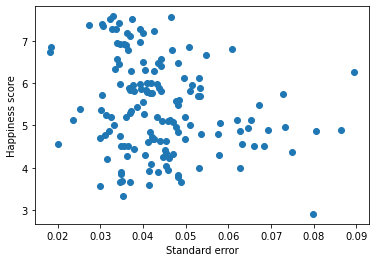

In [18]:
plt.scatter(df_final['Standard Error'], df_final['Happiness Score'])
plt.xlabel('Standard error')
plt.ylabel('Happiness score');

* Their correletion is not upto level so its better to drop

In [19]:
df_final.drop('Standard Error', axis = 1, inplace = True)

C:\Users\mussa\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
#lets split the data
X = df_final.drop('Happiness Score', axis = 1)
y = df_final['Happiness Score']

In [21]:
#lets split the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 42)

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [23]:
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
r2_score(y_test, y_pred)

0.9985510809331856

In [25]:
mean_absolute_error(y_test, y_pred)


0.029622666666665923

In [26]:
mean_squared_error(y_test, y_pred)

0.0016530911933332964

In [27]:
#lets do some hyperparameter tuning
from sklearn.model_selection import GridSearchCV
params = {'n_estimators' : [100,200,300,400,500],
         'max_depth' : [int(x) for x in np.linspace(5, 30, num = 6)],
         'min_samples_split' : [2, 5, 10, 15, 100],
        'min_samples_leaf' : [1, 2, 5, 10]}

rf_grid = GridSearchCV(RandomForestRegressor(),
                      param_grid = params,
                      cv = 2,
                      verbose = True)
rf_grid.fit(X_train, y_train)

Fitting 2 folds for each of 600 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  5.3min finished


GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=True)

In [29]:
y_pred_rf = rf_grid.predict(X_test)

In [30]:
r2_score(y_test, y_pred_rf)

0.9987673793790135

In [31]:
import joblib
joblib.dump(rf_grid, 'RandomforestRegressor.pkl')

['RandomforestRegressor.pkl']